In [78]:
# importing libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# Reading Dataset:
news_data=pd.read_csv(r"C:\Users\admin\Datasets\reddit_worldnews_start_to_2016-11-22.csv")
news_data.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,subreddit
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [80]:
news_data.shape

(509236, 8)

In [81]:
# Checking for null values:
news_data.isnull().sum()

time_created    0
date_created    0
up_votes        0
down_votes      0
title           0
over_18         0
author          0
subreddit       0
dtype: int64

In [82]:
# Removing unwanted columns:
news_data=news_data.drop(["time_created","over_18","up_votes","down_votes","author"],axis=1)
news_data.head()

,date_created,title,subreddit
0,2008-01-25,Scores killed in Pakistan clashes,worldnews
1,2008-01-25,Japan resumes refuelling mission,worldnews
2,2008-01-25,US presses Egypt on Gaza border,worldnews
3,2008-01-25,Jump-start economy: Give health care to all,worldnews
4,2008-01-25,Council of Europe bashes EU&UN terror blacklist,worldnews


# Sentiment Analysis:

In [83]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [84]:
news_list=[]
for i in news_data['title']:
    news_list.append(sia.polarity_scores(i))   

In [85]:
results=[]
for line in news_data['title']:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)


In [86]:
df_news = pd.DataFrame.from_records(results)
df_news.head()

,neg,neu,pos,compound,headline
0,0.529,0.471,0.000,-0.6705,Scores killed in Pakistan clashes
1,0.000,1.000,0.000,0.0000,Japan resumes refuelling mission
2,0.000,1.000,0.000,0.0000,US presses Egypt on Gaza border
3,0.000,0.652,0.348,0.4939,Jump-start economy: Give health care to all
4,0.362,0.638,0.000,-0.5267,Council of Europe bashes EU&UN terror blacklist


In [87]:
df_news['label'] = 0
df_news.loc[df_news['compound'] > 0.2, 'label'] = 1
df_news.loc[df_news['compound'] < -0.2, 'label'] = -1
df_news.head()

,neg,neu,pos,compound,headline,label
0,0.529,0.471,0.000,-0.6705,Scores killed in Pakistan clashes,-1
1,0.000,1.000,0.000,0.0000,Japan resumes refuelling mission,0
2,0.000,1.000,0.000,0.0000,US presses Egypt on Gaza border,0
3,0.000,0.652,0.348,0.4939,Jump-start economy: Give health care to all,1
4,0.362,0.638,0.000,-0.5267,Council of Europe bashes EU&UN terror blacklist,-1


In [88]:
# Counting the label for each news:
df_news['label'].value_counts()

-1    245735
 0    182406
 1     81095
Name: label, dtype: int64

# Exploratory Data Analysis:

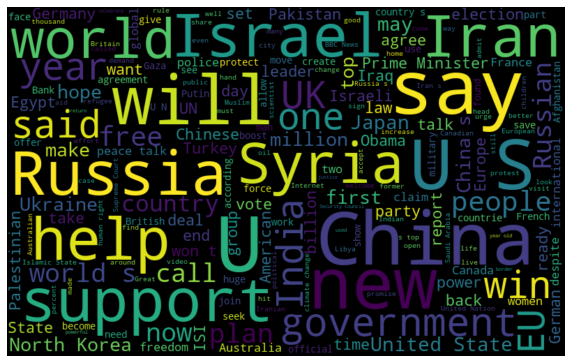

In [89]:
# create text from just Positive headlines:
normal_words = ' '.join([text for text in df_news['headline'][df_news['label'] == 1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig(r'C:\Users\admin\python\plot1.png', dpi=300, bbox_inches='tight')
plt.show()

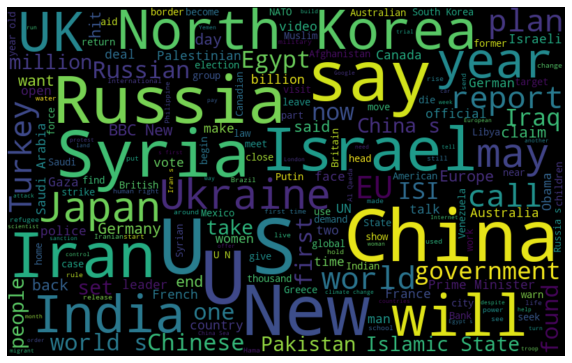

In [90]:
# create text from just neutral headlines:
normal_words = ' '.join([text for text in df_news['headline'][df_news['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig(r'C:\Users\admin\python\plot2.png', dpi=300, bbox_inches='tight')
plt.show()

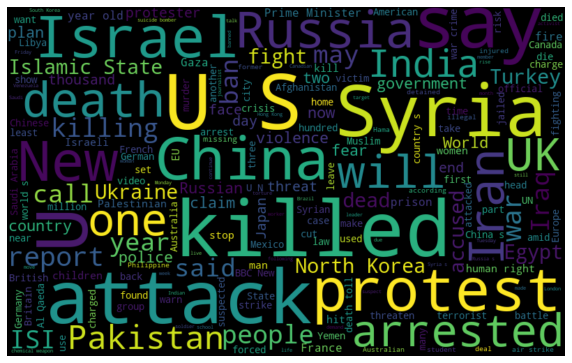

In [91]:
# create text from just negative headline
normal_words = ' '.join([text for text in df_news['headline'][df_news['label'] == -1]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig(r'C:\Users\admin\python\plot3.png', dpi=300, bbox_inches='tight')
plt.show()

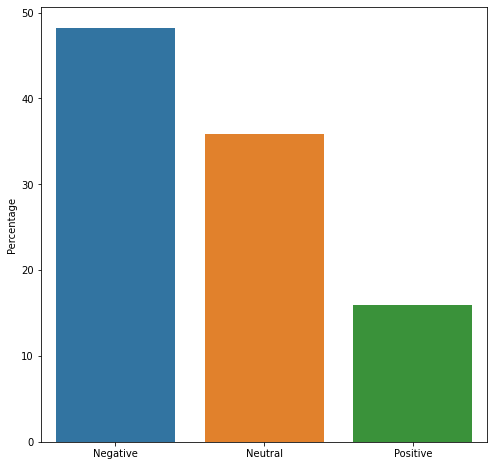

In [55]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df_news.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [56]:
# Printing the positive headlines:
from pprint import pprint
pprint(list(df_news[df_news['label'] == 1].headline)[:5], width=200)


['Jump-start economy: Give health care to all ',
 'Merkel to meet leaders of Turkey, United Arab Emirates ',
 'Babacan vows to surprise all with new wave of EU reform',
 'Sarkozy pair win Ryanair ad case',
 'Multiple Impeachment Resolutions pass in Minnesota Democratic Party precinct caucuses']


In [57]:
# Printing the negative headlines:
from pprint import pprint
pprint(list(df_news[df_news['label'] == -1].headline)[:5], width=200)

['Scores killed in Pakistan clashes',
 'Council of Europe bashes EU&UN terror blacklist',
 'Hay presto! Farmer unveils the  illegal  mock-Tudor castle he tried to hide behind 40ft hay bales',
 'Strikes, Protests and Gridlock at the Poland-Ukraine Border',
 'Nicolas Sarkozy threatens to sue Ryanair ']


In [58]:
# printing the neutral headlines
from pprint import pprint
pprint(list(df_news[df_news['label'] == 0].headline)[:5], width=200)

['Japan resumes refuelling mission',
 'US presses Egypt on Gaza border',
 'The U.N. Mismanagement Program',
 'US plans for missile shields in Polish town met with resistance [video]',
 'Migrant workers told to abandon Lunar New Year holiday plans']


# Text Preprocessing:

## A) Removing Punctations, Numbers, Special Characters:

In [59]:
df_news['headline'] = df_news['headline'].str.replace('[^a-zA-Z#]+',' ')

<ipython-input-59-942417f65772>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_news['headline'] = df_news['headline'].str.replace('[^a-zA-Z#]+',' ')


In [60]:
df_news.head()

,neg,neu,pos,compound,headline,label
0,0.529,0.471,0.000,-0.6705,Scores killed in Pakistan clashes,-1
1,0.000,1.000,0.000,0.0000,Japan resumes refuelling mission,0
2,0.000,1.000,0.000,0.0000,US presses Egypt on Gaza border,0
3,0.000,0.652,0.348,0.4939,Jump start economy Give health care to all,1
4,0.362,0.638,0.000,-0.5267,Council of Europe bashes EU UN terror blacklist,-1


## B) removing stop words:

In [61]:
# remove short words
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
stop = stopwords.words('english')
df_news['headline'] = df_news['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


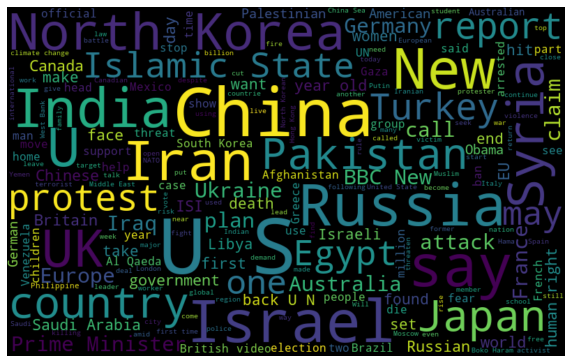

In [62]:

# create text from all headlines:
all_words = ' '.join([text for text in df_news['headline']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [63]:
df_news.head()

,neg,neu,pos,compound,headline,label
0,0.529,0.471,0.000,-0.6705,Scores killed Pakistan clashes,-1
1,0.000,1.000,0.000,0.0000,Japan resumes refuelling mission,0
2,0.000,1.000,0.000,0.0000,US presses Egypt Gaza border,0
3,0.000,0.652,0.348,0.4939,Jump start economy Give health care,1
4,0.362,0.638,0.000,-0.5267,Council Europe bashes EU UN terror blacklist,-1


## C) Tokenization:

In [64]:
# create new variable tokenized headline
tokenized_headline =df_news['headline'].apply(lambda x: x.split())

# D) Text Normalization:
## D.1) Stemming:

In [65]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_headline
tokenized_headline = tokenized_headline.apply(lambda x: [stemmer.stem(i) for i in x])

## D.2) Normalization:

In [66]:
# create new variable tokenized headline
tokenized_headline_lemma =df_news['headline'].apply(lambda x: x.split())

from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer() 
df_news['headline'] = tokenized_headline_lemma.apply(lambda x: [wn.lemmatize(i) for i in x])


In [67]:
df_news.head()

,neg,neu,pos,compound,headline,label
0,0.529,0.471,0.000,-0.6705,"[Scores, killed, Pakistan, clash]",-1
1,0.000,1.000,0.000,0.0000,"[Japan, resume, refuelling, mission]",0
2,0.000,1.000,0.000,0.0000,"[US, press, Egypt, Gaza, border]",0
3,0.000,0.652,0.348,0.4939,"[Jump, start, economy, Give, health, care]",1
4,0.362,0.638,0.000,-0.5267,"[Council, Europe, bash, EU, UN, terror, blackl...",-1


In [68]:
model_df=df_news.copy() 

In [69]:
model_df=model_df.drop(['neg','neu','pos','compound'],axis=1)

In [70]:
model_df.head()

,headline,label
0,"[Scores, killed, Pakistan, clash]",-1
1,"[Japan, resume, refuelling, mission]",0
2,"[US, press, Egypt, Gaza, border]",0
3,"[Jump, start, economy, Give, health, care]",1
4,"[Council, Europe, bash, EU, UN, terror, blackl...",-1


In [71]:
model_df['headline'] = model_df['headline'].map(lambda x: str(x).lstrip('[').rstrip(']'))


In [72]:
model_df.head()

,headline,label
0,"'Scores', 'killed', 'Pakistan', 'clash'",-1
1,"'Japan', 'resume', 'refuelling', 'mission'",0
2,"'US', 'press', 'Egypt', 'Gaza', 'border'",0
3,"'Jump', 'start', 'economy', 'Give', 'health', ...",1
4,"'Council', 'Europe', 'bash', 'EU', 'UN', 'terr...",-1


# Train Test Split:

In [73]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(model_df,test_size = 0.2,random_state=0,stratify = model_df.label.values)
#stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (407388, 2)
valid shape :  (101848, 2)


# Predictive Modelling:

## Counter Vectorizer For Multi Class Classification

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.headline.values)
X_valid = vectorizer.transform(valid.headline.values)

y_train = train.label.values
y_valid = valid.label.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (407388, 73604)
X_train.shape :  (101848, 73604)
y_train.shape :  (407388,)
y_valid.shape :  (101848,)


## Naive Bayes Classifier for MULTICLASS Classification

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train,y_train)

NB_prediction = naiveByes_clf.predict(X_valid)
NB_accuracy = accuracy_score(y_valid,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train,y_train))
print("Validation accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_valid))

training accuracy Score    :  0.7859313480023957
Validation accuracy Score :  0.7473686277590135
              precision    recall  f1-score   support

          -1       0.85      0.78      0.82     53659
           0       0.67      0.71      0.69     34602
           1       0.59      0.70      0.64     13587

    accuracy                           0.75    101848
   macro avg       0.71      0.73      0.72    101848
weighted avg       0.76      0.75      0.75    101848



# Logistic Regression(For Multiclass Classification)

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

logreg_prediction = logreg.predict(X_valid)
logreg_accuracy = accuracy_score(y_valid,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train,y_train))
print("Validation accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_valid))

c:\users\admin\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy Score    :  0.9197129026873644
Validation accuracy Score :  0.8926733956484173
              precision    recall  f1-score   support

          -1       0.94      0.93      0.93     49645
           0       0.87      0.87      0.87     36439
           1       0.82      0.84      0.83     15764

    accuracy                           0.89    101848
   macro avg       0.87      0.88      0.88    101848
weighted avg       0.89      0.89      0.89    101848

